In [1]:
import sys  
sys.path.insert(0, '..')
sys.path.insert(0, '../src')
%cd ../src

/Users/vornao/Desktop/unipi/ML/code/first_nn/src


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import colors


from src.utils import SingleClassError, MultiClassError, one_hot_encoder
import src.network as network
from src.activation_functions import Sigmoid, ReLU


from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    multilabel_confusion_matrix,
)


mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["figure.figsize"] = 10, 5


In [3]:
monk1_train = pd.read_csv("../data/monk/monks-1.train", sep=" ")
monk1_test = pd.read_csv("../data/monk/monks-1.train", sep=" ")

monk1_test.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 124 entries, nan to nan
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      124 non-null    int64 
 1   a2      124 non-null    int64 
 2   a3      124 non-null    int64 
 3   a4      124 non-null    int64 
 4   a5      124 non-null    int64 
 5   a6      124 non-null    int64 
 6   a7      124 non-null    int64 
 7   a8      124 non-null    object
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [9]:
x_train = monk1_train[["a1", "a2", "a3", "a4", "a5", "a6", "a7"]].to_numpy()
y_train = monk1_train["a1"].to_numpy()

x_train, x_val = x_train[:100], x_train[100:]
y_train, y_val = y_train[:100], y_train[100:]

x_test = monk1_test[["a1", "a2", "a3", "a4", "a5", "a6", "a7"]].to_numpy()
y_test = monk1_test["a1"].to_numpy()


In [14]:
import importlib
importlib.reload(network)

net = network.Network(6)
net.add_layer(3, Sigmoid(1), bias=0.5)
net.add_output_layer(1, Sigmoid(1))

stats = net.train(
    x_train,
    y_train,
    x_val,
    y_val,
    estimator=SingleClassError(),
    eta=10e-3,
    epochs=500,
    verbose=False,
)


Epoch : 500 -  Training Loss: 0.42 - Validaition Loss 0.8333
------------------------------------------------------------


> Model accuracy: 50.0%. ROC AUC Score: 0.5


<AxesSubplot:>

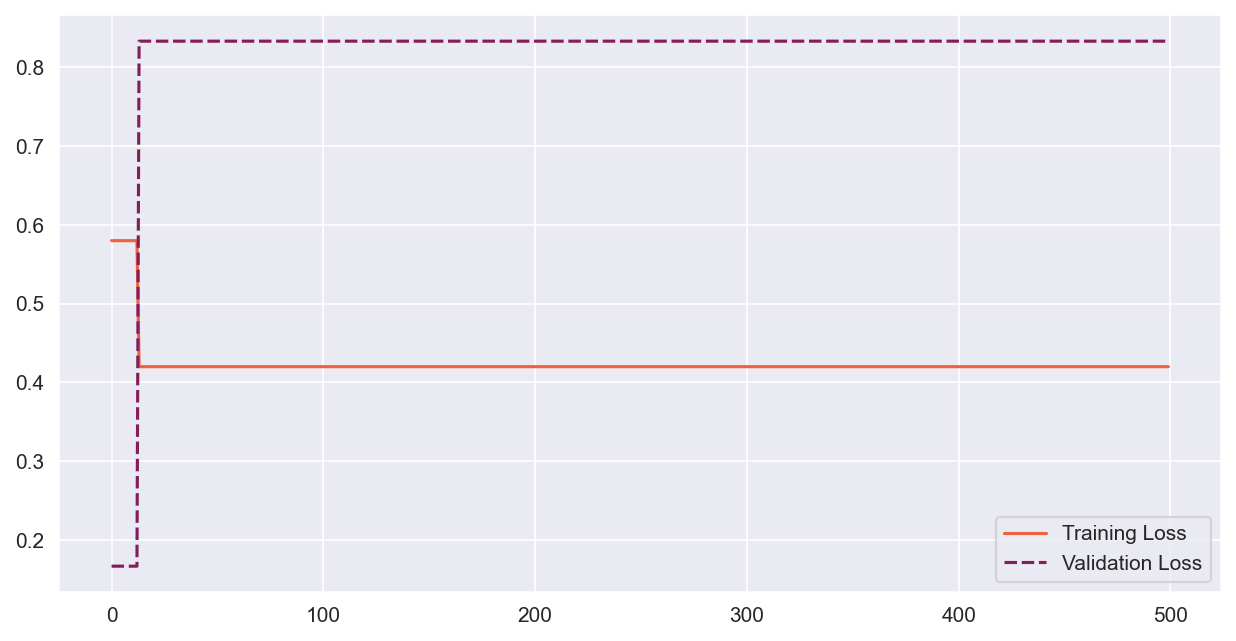

In [13]:
predictions = []

for p in x_test:
    predictions.append(round(net.output(p)[0]))

predictions = np.array(predictions)

accuracy = round(accuracy_score(y_test, predictions), 2) * 100
roc = round(roc_auc_score(y_test, predictions), 2)
fpr, tpr, _ = roc_curve(y_test, predictions)
print(f"> Model accuracy: {accuracy}%. ROC AUC Score: {roc}")

losses = pd.DataFrame({"Training Loss": stats[0], "Validation Loss": stats[1]})

palette = sns.color_palette("rocket_r", 2)
sns.set_style("darkgrid")
sns.lineplot(losses, palette=palette)


In [6]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(7,1)),
  tf.keras.layers.Dense(3, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,verbose=0)

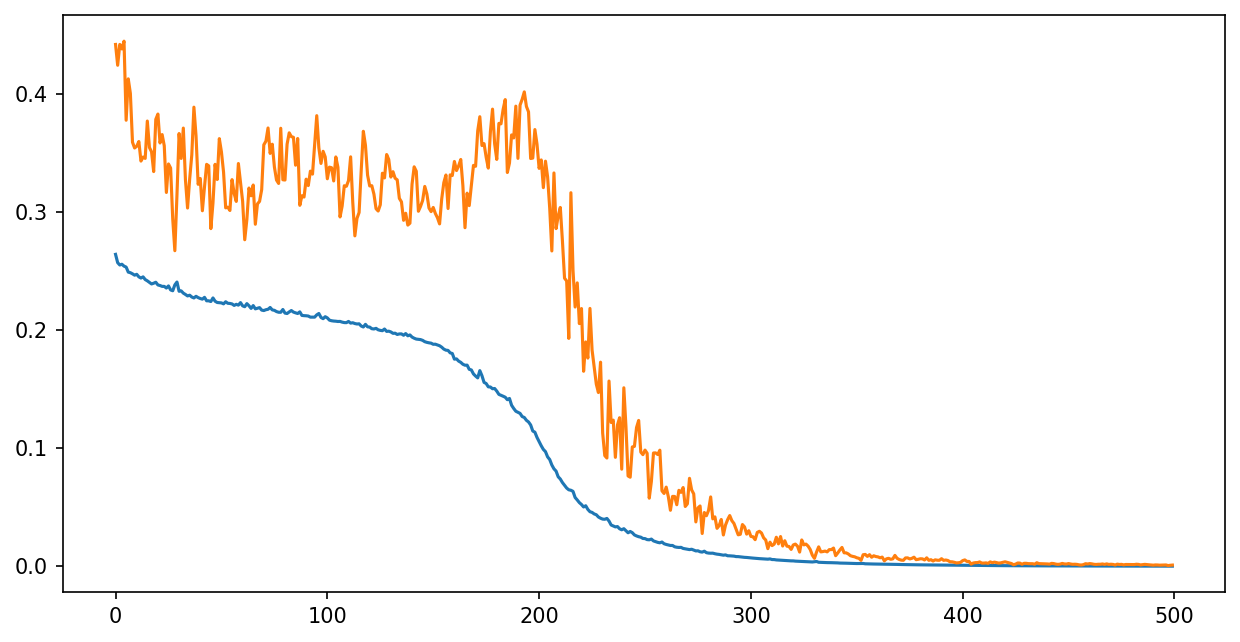

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [24]:
model.evaluate(x_test,  y_test, verbose=2)

1/1 - 1s - loss: 0.2509 - accuracy: 0.5833 - 847ms/epoch - 847ms/step


[0.2509326636791229, 0.5833333134651184]